# Image plates of duckweed in growth assay experiment

Ensure the following before running anything in this notebook:
 - The machine is switched on, connected to the computer and all axes have been homed. 
 - The camera tool is accessible and in position 1 on the Jubilee
 
 Once those steps are complete run the cells in this notebook in order

In [1]:
#Importing python libraries downloaded from the internet and those saved locally

# import yaml
import matplotlib
matplotlib.use('TkAgg') 
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import json
import threading
from datetime import date
import ipywidgets as widgets


In [2]:
def search_up_dirs(target_dir, max_cycles):
    n = 0
    while n != max_cycles:
        curr_folder = os.path.basename(os.path.normpath(os.getcwd()))
        if curr_folder == target_dir:
            break
        os.chdir('..')
        n = n + 1
        
search_up_dirs('duckbot', 5) #Shift to duckbot
os.chdir('notebooks')

import utils.PlatePositionUtils as pp 
# from utils.MachineUtils import * 
# from utils.CameraUtils import * #Note that this library requirs a package that can only be installed on raspbery pi. 
import utils.ImageCaptureUtils as im

ModuleNotFoundError: No module named 'picamera'

In [5]:
port = '/dev/ttyACM0'
m = MachineCommunication(port)
m.toolChange(1)

## 1. Select config file and define directory for storing output image data

### Select config file
Select the config file that matches the experiment you are collecting data for

In [3]:
search_up_dirs('duckbot', 5) #Shift to duckbot

expt_config_file_dir = os.path.join(os.getcwd(),'ConfigFiles/ExptConfigs')

os.chdir(expt_config_file_dir)
config_opts = os.listdir(os.getcwd())
expt_choice = widgets.Dropdown(options = config_opts)
display(expt_choice)

Dropdown(options=('Test_082422.json', 'Expt_082222.json', 'Test_expt.json', '.ipynb_checkpoints', 'Test_082422…

In [4]:
print("You selected:")
print(expt_choice.value)
print("If this is not correct re-select before continuing")

You selected:
Expt_082222.json
If this is not correct re-select before continuing


In [6]:
expt_setup_filepath = expt_config_file_dir + '/' + expt_choice.value

with open(expt_setup_filepath,'r') as datafile:
    expt_data = json.load(datafile)

#Host directory that you want to host the folder with your image files. End with forward slash
expt_name = expt_data["Experiment_name"]

output_data_dir_opts = [os.path.join(x, expt_name) for x in expt_data["Experimental_data_directories"]]
# output_data_dir_opts = expt_data["Experimental_data_directories"]
sample_data_dict = expt_data["sample_info"]

search_up_dirs('duckbot', 5) #Shift to duckbot

Experimental_data_host_directory = os.path.join(os.getcwd(),'test_data/')
data_dir = os.path.join(Experimental_data_host_directory, expt_name)

if not os.path.exists(data_dir):
    os.mkdir(data_dir) 

## 2. Load plates into machine

In [16]:
#Drop bed down and add plates
plates_to_image = im.pull_plates_to_image(expt_setup_filepath)

m.moveTo(z=100)

print(f'Load the following experimental plates into the appropriate positions on the bed: {plates_to_image}')
print("Add plates to the bed. Hit any button to confirm and proceed")
input()

Load the following experimental plates into the appropriate positions on the bed: ['1', '2', '3']
Add plates to the bed. Hit any button to confirm and proceed
l


'l'

## 3. Focus camera
Run the cells below. It will move the camera over the first well of the first plate and then pop up a live camera window. Manually adjust the focus to the desired point by twisting the housing of the camera lens. You will need to loosen the nut that holds the lens in place to be able to adjust the focus and then tighten it again once you are done. Then hit the escape key to close the window

In [17]:
#Move camera over first well to be imaged
im.move_to_first_well(m, plates_to_image)

In [18]:
#Open a live video window
cap = cv2.VideoCapture(0) #Note that the index corresponding to your camera may not be zero but this is the most common default

while True:
    ret, frame = cap.read()
    cv2.imshow('Input', frame)
    c = cv2.waitKey(1)
    if c ==27: #27 is the built in code for ESC so press escape to close the window. 
        break 
        
cap.release()

cv2.destroyAllWindows()

## 4. Capture and save images

Imaging every well, will take approx. 1.0 minutes


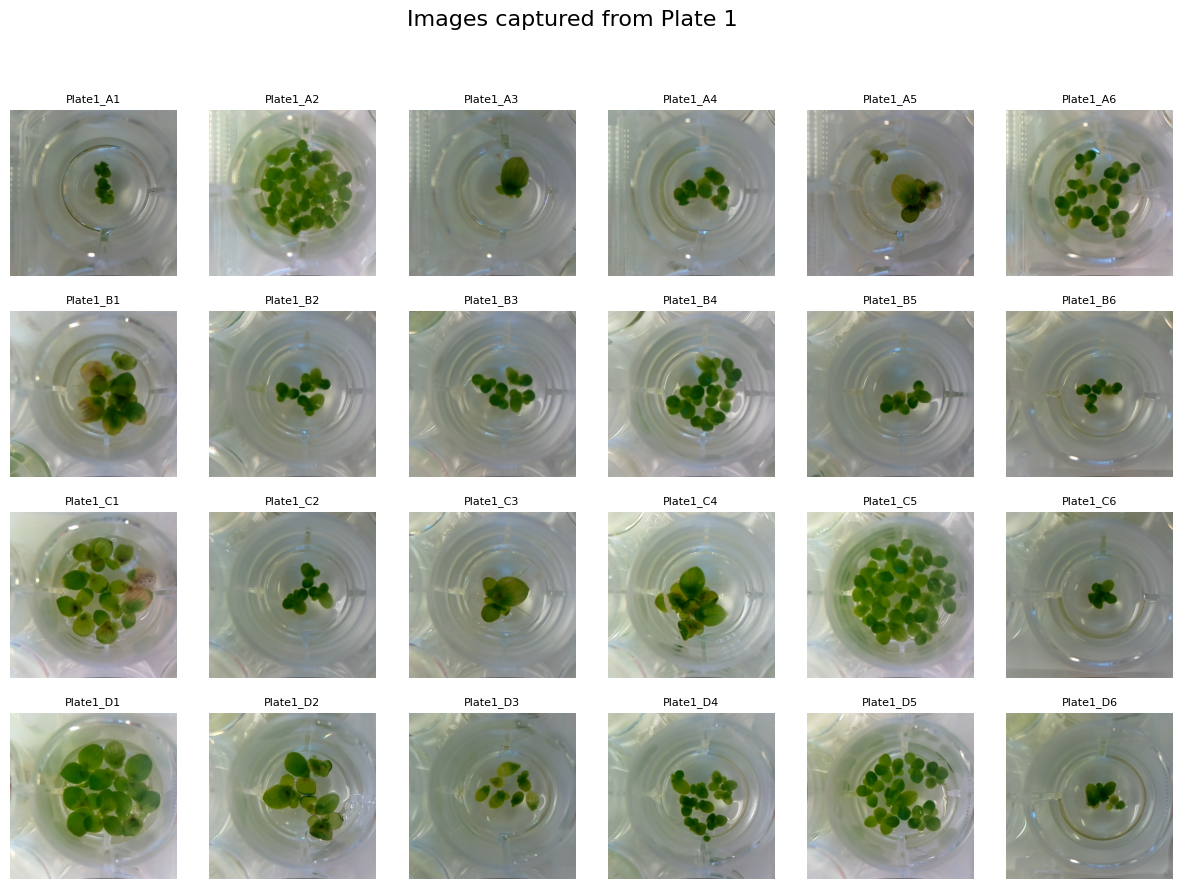

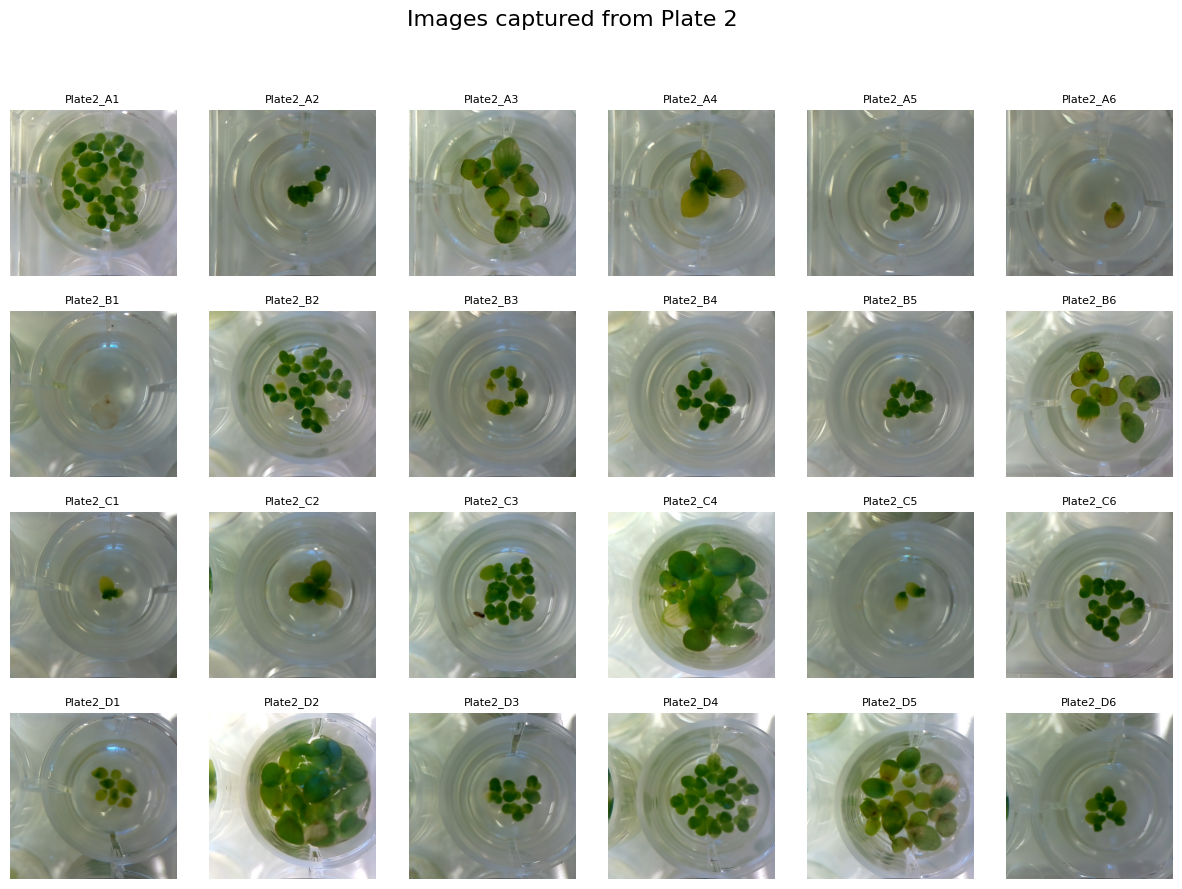

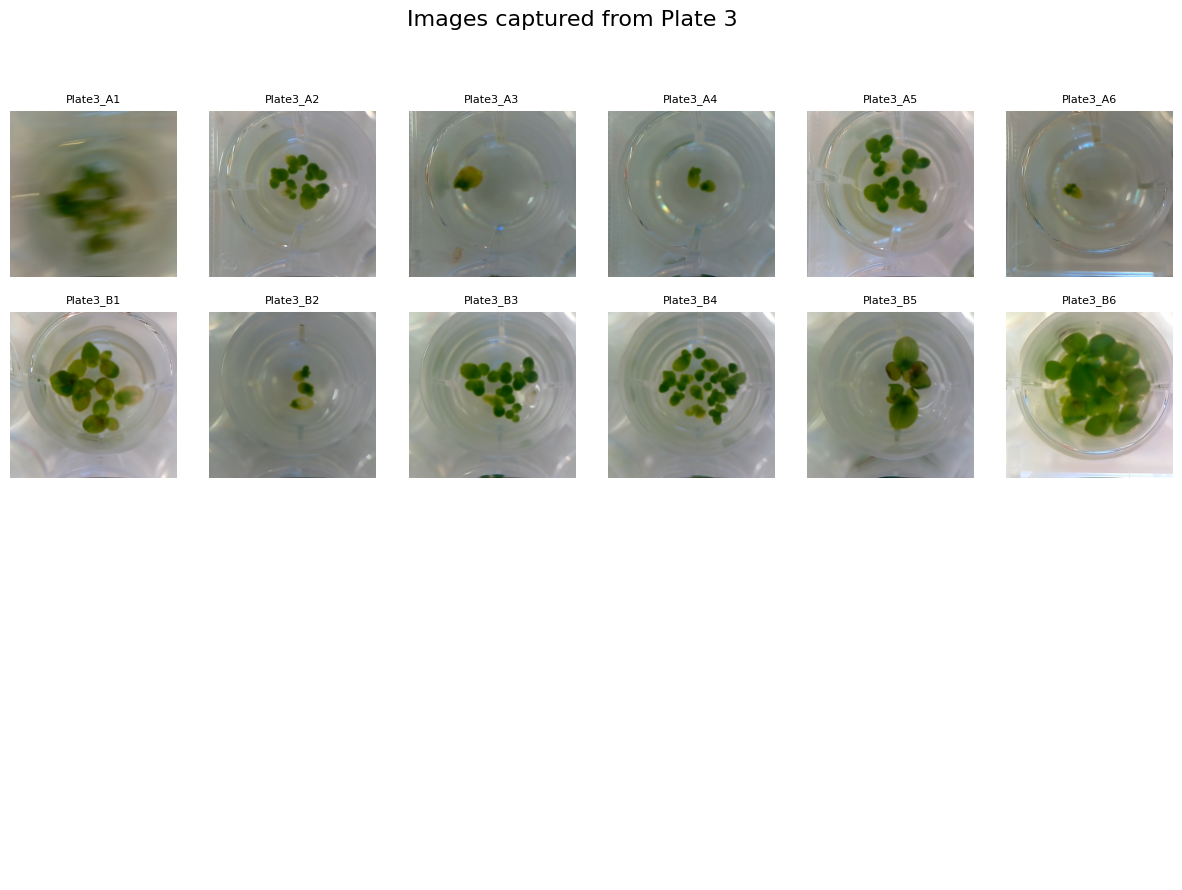

In [19]:
%matplotlib inline

df_with_well_coords = pp.add_well_coords_to_df_from_sample_data_dict(sample_data_dict)

im.image_plates(m, df_with_well_coords, data_dir, expt_name)

plates = list(np.unique(df_with_well_coords['Plate']))
plates = [int(x[-1]) for x in plates]

im.create_plate_image_grid(df_with_well_coords, data_dir)

In [20]:
m.moveTo(z=100)
print("Please remove plates from machine then hit any key to continue")
input()

Please remove plates from machine then hit any key to continue
l


'l'